در این نوت‌بوک به دلیل اینکه نصب کتابخانه‌های مربوط به گراف در ویندوز مشکل است، خروجی‌ها پاک نشده. ولی در صورتی که کتابخانه‌های مورد نیاز را نصب کردید، می‌توانید همه‌ی سلول‌ها را خودتان اجرا کنید.

## اضافه کردن کتابخانه‌های مورد نیاز

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import pandas as pd

## جدا کردن ورودی و خروجی و داده‌ی آموزش و آزمون
- برای اینکه نتایج برای همه یکسان باشد، `random_state` برای همه برابر عددی ثابت قرار داده شده است.

In [6]:
data = pd.read_csv('wbc.csv',index_col='id')
X = data.drop(columns='diagnosis')
y = data['diagnosis'].map({'B':0,'M':1})
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                test_size = 0.2,
                                                stratify = y,
                                                random_state = 1)

## آموزش مدل
یک مدل درخت تصمیم ایجاد می‌کنیم و آن را روی داده‌های آموزشی برازش می‌کنیم.

In [8]:
# calling the model
tree_model = DecisionTreeClassifier()
# trainig the data
tree_model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

نتیجه‌ی مدل را برای ورودی‌های آزمون می‌گیریم و بر همین اساس دقت آن را محاسبه می‌کنیم.

In [12]:
y_predicted = tree_model.predict(X_test)
acc = accuracy_score(y_test,y_predicted)
acc

0.9210526315789473

## رسم کردن درخت
حال به کمک کتابخانه‌ی `pydotplus` درخت ساخته‌شده را رسم می‌کنیم.

In [13]:
dot_data = StringIO()

In [15]:
export_graphviz(tree_model, out_file=dot_data,  
              filled=True, rounded=True,
              special_characters=True)

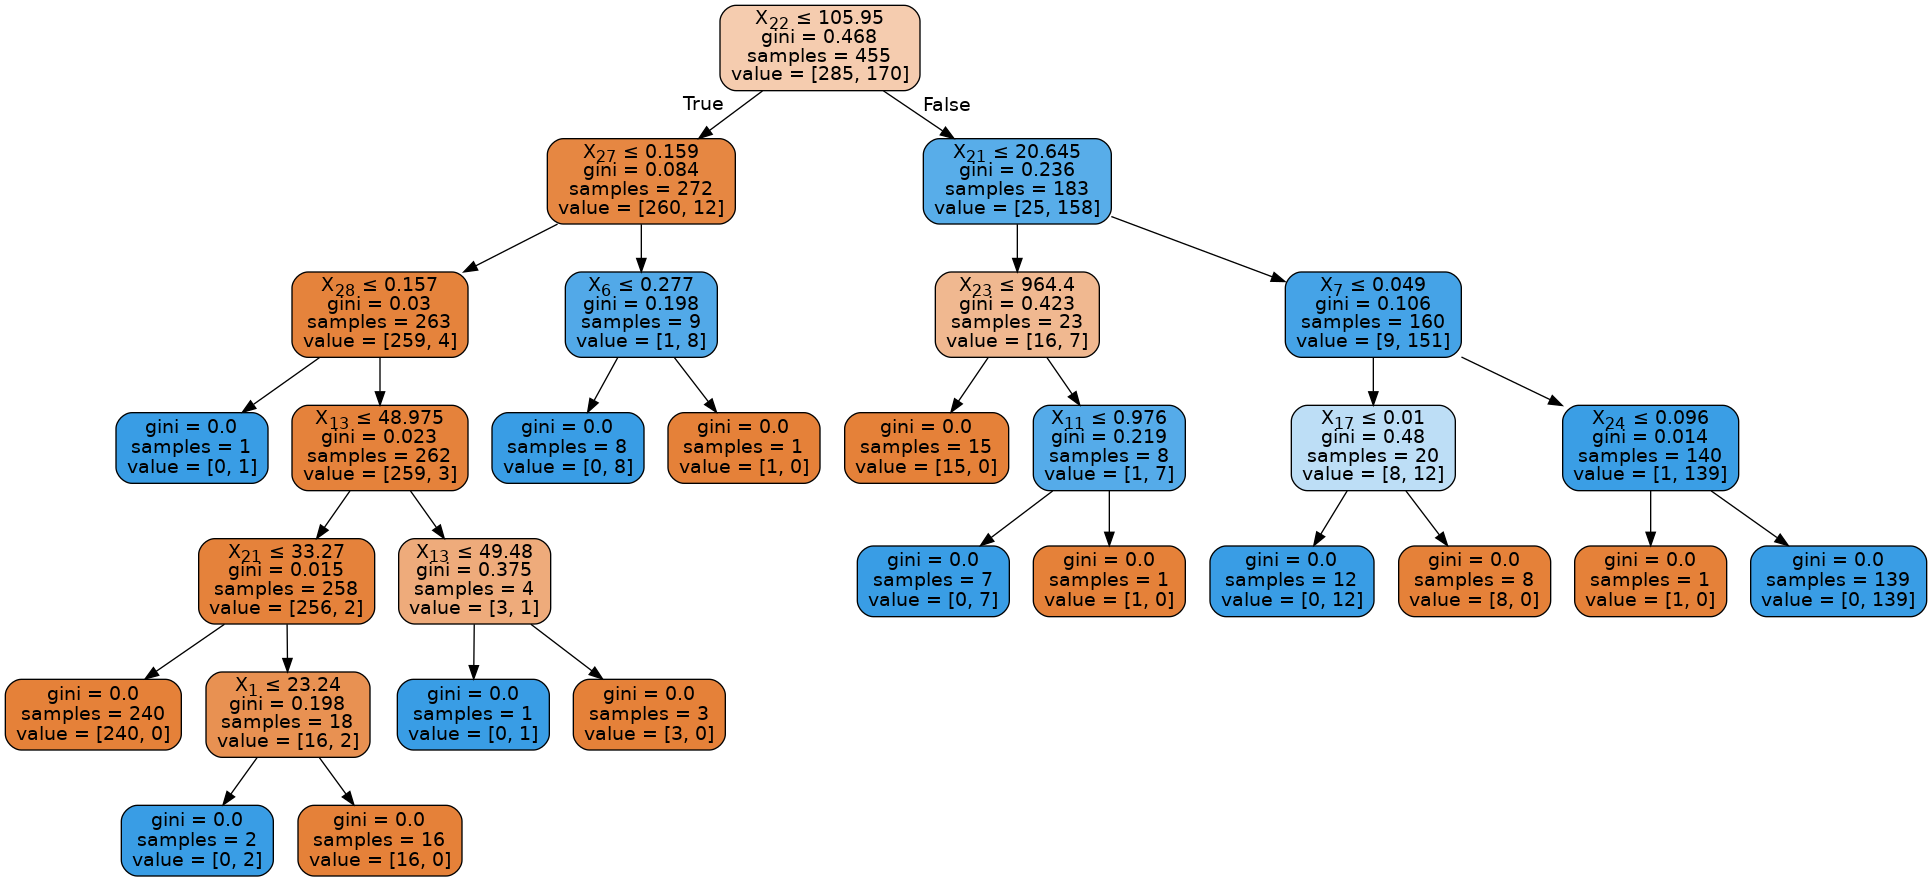

In [31]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())